In [45]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.linear_model import LogisticRegression

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [65]:
runs_df = pd.read_csv('test.tsv' , sep= "        ",)


/Users/Rhys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


#### q = mass ratio 
#### I = inclination (can't work out how to do iota in numbers/excel yet !) 
#### Measured = whether we measured precession or not , measured = 0 corresponds to did not measure precession , =1 means we did and 0.5 was not clear either way ( We were planning to take second opinions)

In [66]:
print(runs_df.columns.values)


['IFOH' 'IFOL' 'IFOV' 'Noise' 'SNR' 'i' 'm' 'q' 'S1x' 'S1y' 'S1z' 'S2x'
 'S2y' 'S2z' 'measured']


In [67]:
runs_df

,IFOH,IFOL,IFOV,Noise,SNR,i,m,q,S1x,S1y,S1z,S2x,S2y,S2z,measured
0,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,15,4,0.75,0.00,0.00,0,0,0,0.0
1,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,20,4,0.75,0.00,0.00,0,0,0,0.0
2,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,25,4,0.75,0.00,0.00,0,0,0,0.0
3,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,30,4,0.75,0.00,0.00,0,0,0,0.0
4,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,35,4,0.75,0.00,0.00,0,0,0,0.0
5,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,40,4,0.75,0.00,0.00,0,0,0,0.0
6,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,60,4,0.75,0.00,0.00,0,0,0,0.0
7,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,80,4,0.75,0.00,0.00,0,0,0,0.0
8,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,5,60,100,4,0.75,0.00,0.00,0,0,0,0.0
9,/home/c1737564/github/Precession/files_for_pe_...,/home/c1737564/github/Precession/files_for_pe_...,NaN,Zero,13,60,15,2,0.75,0.00,0.00,0,0,0,0.0


In [49]:
del(runs_df['IFOH'])
del(runs_df['IFOL'])
del(runs_df['IFOV'])
del(runs_df['Noise'])


In [50]:
runs_df.tail()

,SNR,i,m,q,S1x,S1y,S1z,S2x,S2y,S2z,measured
108,75,60,80,7,0.50,0.00,0.00,0,0,0,1.0
109,75,90,80,7,0.25,0.25,0.25,0,0,0,1.0
110,75,90,90,8,0.25,0.25,0.25,0,0,0,0.0
111,100,60,80,7,0.50,0.00,0.00,0,0,0,1.0
112,100,90,70,6,0.25,0.25,0.25,0,0,0,0.0


In [51]:
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
SNR         113 non-null int64
i           113 non-null int64
m           113 non-null int64
q           113 non-null int64
S1x         113 non-null float64
S1y         113 non-null float64
S1z         113 non-null float64
S2x         113 non-null int64
S2y         113 non-null int64
S2z         113 non-null int64
measured    113 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.8 KB


#### Below we will show the proportion of runs corresponding to certain features e.g. in the first we have 5 runs at mass 15, below tha we will show the proportion of those runs that we succesfully recovered precession 

In [52]:
print(runs_df[['m', 'measured']].groupby(['m']).size().sort_values())

print(runs_df[['m'
               , 'measured']].groupby(['m']
               , as_index=True).mean().sort_values(by='measured'
               , ascending=True))

m
75      2
15      5
70      5
20      6
25      6
35      6
90      6
30      7
100     8
60     13
80     24
40     25
dtype: int64
     measured
m            
75   0.000000
70   0.400000
20   0.500000
30   0.500000
90   0.500000
40   0.580000
15   0.600000
25   0.666667
100  0.687500
35   0.750000
80   0.833333
60   0.884615


In [53]:
print(runs_df[['S1x', 'measured']].groupby(['S1x']).size().sort_values())

print(runs_df[['S1x'
               , 'measured']].groupby(['S1x']
               , as_index=True).mean().sort_values(by='measured'
               , ascending=True))

S1x
0.00     1
0.25     6
0.50    18
0.75    88
dtype: int64
      measured
S1x           
0.00  0.000000
0.25  0.500000
0.50  0.555556
0.75  0.698864


In [54]:
print(runs_df[['q', 'm']].groupby(['q']).size())

print(runs_df[['q'
               , 'measured']].groupby(['q']
               , as_index=True).mean().sort_values(by='measured'
               , ascending=True))

q
1     11
2     18
3      1
4     63
6      5
7      8
8      6
20     1
dtype: int64
    measured
q           
3   0.000000
20  0.000000
1   0.045455
6   0.600000
2   0.611111
8   0.666667
4   0.777778
7   0.875000


In [15]:
print(bin_runs_df[['SNR', 'binary']].groupby(['SNR']).size())

print(bin_runs_df[['SNR', 'binary']].groupby(['SNR']
                    ,as_index=True).mean().sort_values(by='binary'
                    , ascending=True))

SNR
25    54
50     9
dtype: int64
       binary
SNR          
25   0.462963
50   0.888889


In [16]:
print(bin_runs_df[['i', 'binary']].groupby(['i']).size())

print(bin_runs_df[['i', 'binary']].groupby(['i']
                            ,as_index=True).mean().sort_values(by='binary'
                            , ascending=True))

i
0      4
10     3
20     4
30     4
40     4
50     4
60    32
70     4
80     4
dtype: int64
      binary
i           
20  0.000000
0   0.250000
30  0.250000
10  0.333333
40  0.500000
50  0.500000
80  0.500000
60  0.656250
70  0.750000


#### try and visualise the different where in the different features we can recover precession

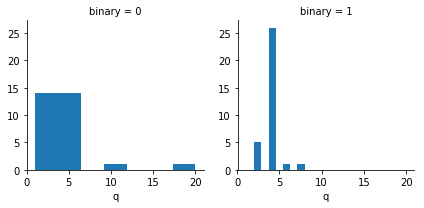

In [44]:
g = sns.FacetGrid(bin_runs_df, col='binary')
g.map(plt.hist, 'q', bins=7)

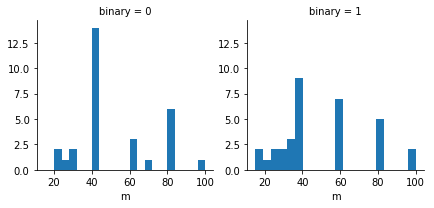

In [46]:
g = sns.FacetGrid(bin_runs_df, col='binary')
g.map(plt.hist, 'm', bins=20)

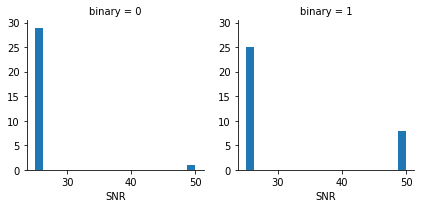

In [48]:
g = sns.FacetGrid(bin_runs_df, col='binary')
g.map(plt.hist, 'SNR', bins=20)

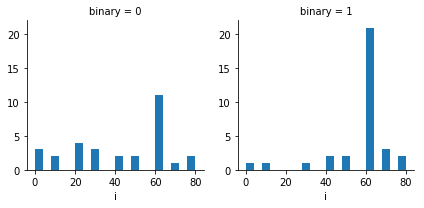

In [50]:
g = sns.FacetGrid(bin_runs_df, col='binary')
g.map(plt.hist, 'i',bins=20)

#### the plots below show the "measurability" for the same parameters as above but also conditioned on another parameter as well

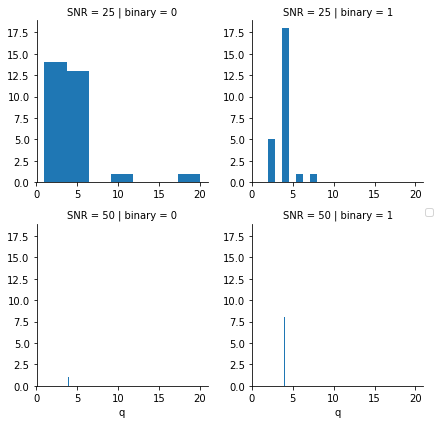

In [52]:
grid = sns.FacetGrid(bin_runs_df, col='binary', row='SNR')
grid.map(plt.hist, 'q', bins=7)
grid.add_legend();

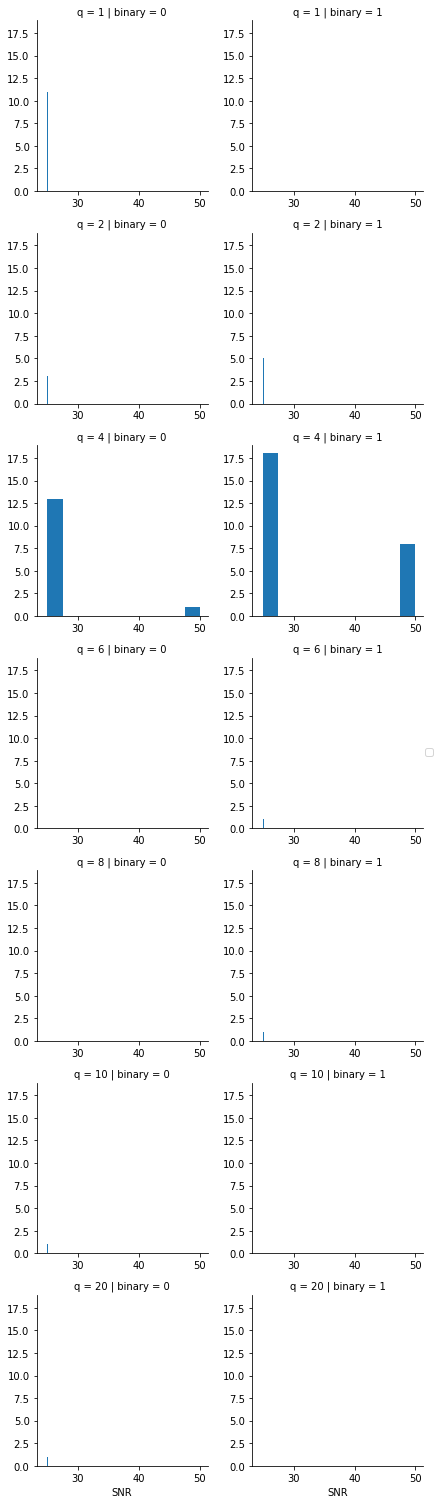

In [53]:
grid = sns.FacetGrid(bin_runs_df, col='binary', row='q')
grid.map(plt.hist, 'SNR', bins=10)
grid.add_legend();

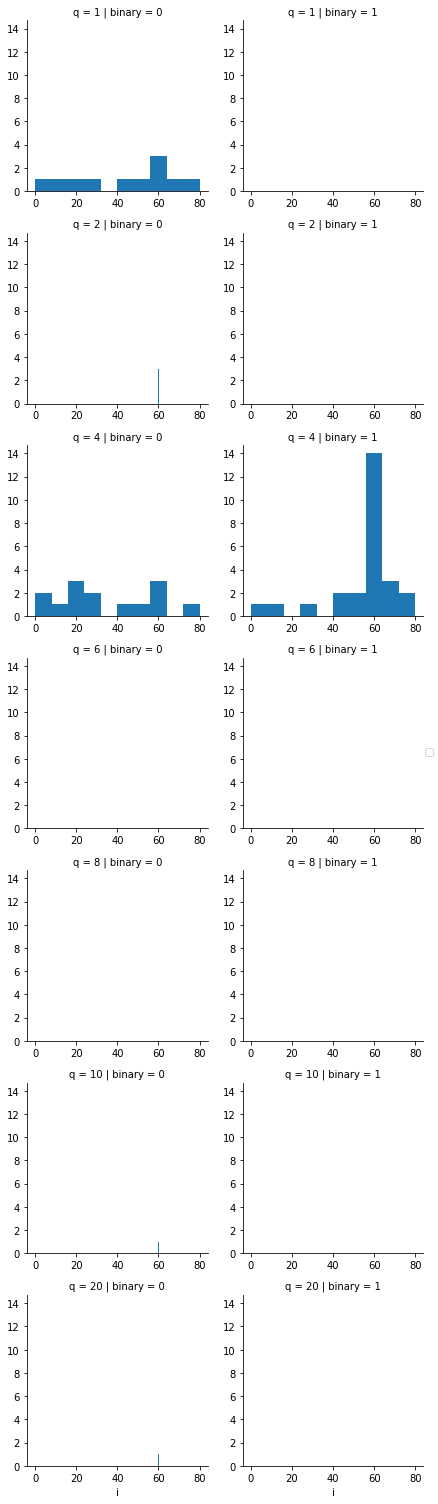

In [54]:
grid = sns.FacetGrid(bin_runs_df, col='binary', row='q')
grid.map(plt.hist, 'i', alpha=1, bins=10)
grid.add_legend();

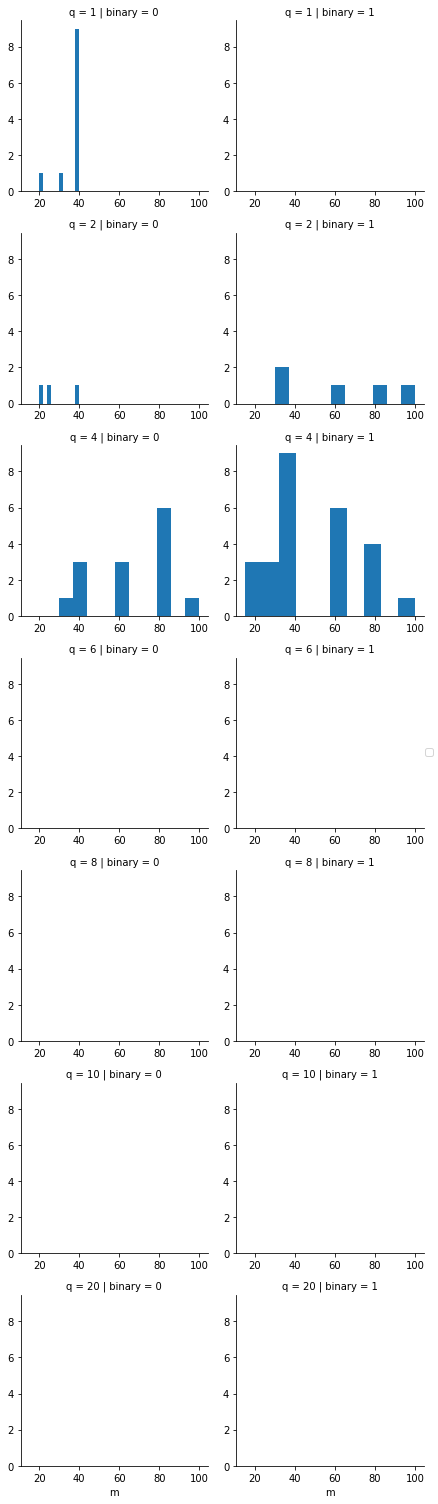

In [55]:
grid = sns.FacetGrid(bin_runs_df, col='binary', row='q')
grid.map(plt.hist, 'm', alpha=1, bins=10)
grid.add_legend();

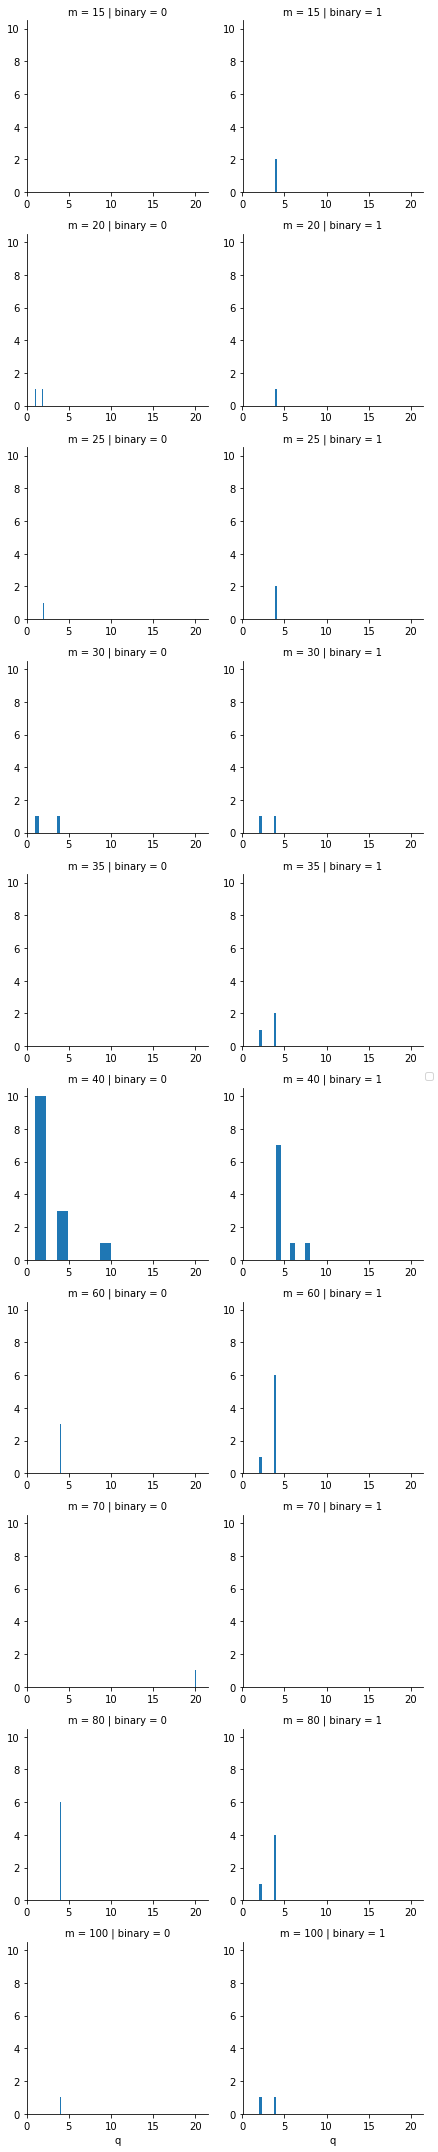

In [56]:
grid = sns.FacetGrid(bin_runs_df, col='binary', row='m')
grid.map(plt.hist, 'q', alpha=1, bins=7)
grid.add_legend();

In [189]:
help(sns.FacetGrid.map)

Help on function map in module seaborn.axisgrid:

map(self, func, *args, **kwargs)
    Apply a plotting function to each facet's subset of the data.
    
    Parameters
    ----------
    func : callable
        A plotting function that takes data and keyword arguments. It
        must plot to the currently active matplotlib Axes and take a
        `color` keyword argument. If faceting on the `hue` dimension,
        it must also take a `label` keyword argument.
    args : strings
        Column names in self.data that identify variables with data to
        plot. The data for each variable is passed to `func` in the
        order the variables are specified in the call.
    kwargs : keyword arguments
        All keyword arguments are passed to the plotting function.
    
    Returns
    -------
    self : object
        Returns self.



In [71]:

# del(bin_runs_df['Noise'])

# X_data = bin_runs_df.drop("binary", axis=1)
# Y_data = bin_runs_df["binary"]


X_data.tail()
Y_data.head()

27    0
28    0
29    0
30    1
31    0
Name: binary, dtype: int64

In [65]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_data, Y_data)
acc_log = round(logreg.score(X_data, Y_data) * 100, 2)
acc_log

#
#Score Returns the coefficient of determination R^2 of the prediction.
#The coefficient R^2 is defined as (1 - u/v), 
#where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
#A constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

68.25

In [74]:
coeff_df = pd.DataFrame(bin_runs_df.columns.delete(5))

print(coeff_df)

coeff_df.columns = ['Parameter']
coeff_df["Correlation_Coefficient"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation_Coefficient', ascending=False)


     0
0  SNR
1    i
2    m
3    q
4    s


,Parameter,Correlation_Coefficient
0,SNR,0.036486
1,i,0.021014
3,q,0.017216
2,m,-0.006081
4,s,-0.797453


#### Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).